## Regresion ridge (regularización)

$J(\theta_0, \theta_1, \theta_2) = \frac{1}{2m} \sum_{i=1}^m \left( \hat{y}^{(i)} - y^{(i)} \right)^2 + \lambda \sum \beta_i^2$



$\frac{\partial J}{\partial \theta_1} = \frac{1}{m} \sum_{i=1}^m \left( \hat{y}^{(i)} - y^{(i)} \right) x^{(i)} + 2\lambda \beta_i$



In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error

# Cargar datos
url = 'https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/housing.csv'
data = pd.read_csv(url)

# Selección de características y target
X = data.drop(columns=['median_house_value', 'ocean_proximity'])
X['total_bedrooms'] = X.total_bedrooms.fillna(X.total_bedrooms.mean())
y = data['median_house_value']

# Escalado de las características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# División en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [15]:
# Modelo de Regresión Lineal
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Modelo de Ridge con penalización (λ = 10)
ridge_model = Lasso(alpha=800)
ridge_model.fit(X_train, y_train)

# Predicciones
y_pred_linear = linear_model.predict(X_test)
y_pred_ridge = ridge_model.predict(X_test)

# Métricas de error
mse_linear = mean_squared_error(y_test, y_pred_linear)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)

print(f"MSE de Regresión Lineal: {mse_linear:.2f}")
print(f"MSE de Ridge Regression (λ=10): {mse_ridge:.2f}")


MSE de Regresión Lineal: 5052953703.90
MSE de Ridge Regression (λ=10): 5047541580.54


In [16]:
from sklearn.metrics import r2_score
# Modelo de Regresión Lineal
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Modelo de Ridge con penalización (λ = 10)
ridge_model = Lasso(alpha=100)
ridge_model.fit(X_train, y_train)

# Predicciones
y_pred_linear = linear_model.predict(X_test)
y_pred_ridge = ridge_model.predict(X_test)

# Métricas de error
mse_linear = r2_score(y_test, y_pred_linear)
mse_ridge = r2_score(y_test, y_pred_ridge)

print(f"MSE de Regresión Lineal: {mse_linear:.2f}")
print(f"MSE de Ridge Regression (λ=10): {mse_ridge:.2f}")


MSE de Regresión Lineal: 0.61
MSE de Ridge Regression (λ=10): 0.61


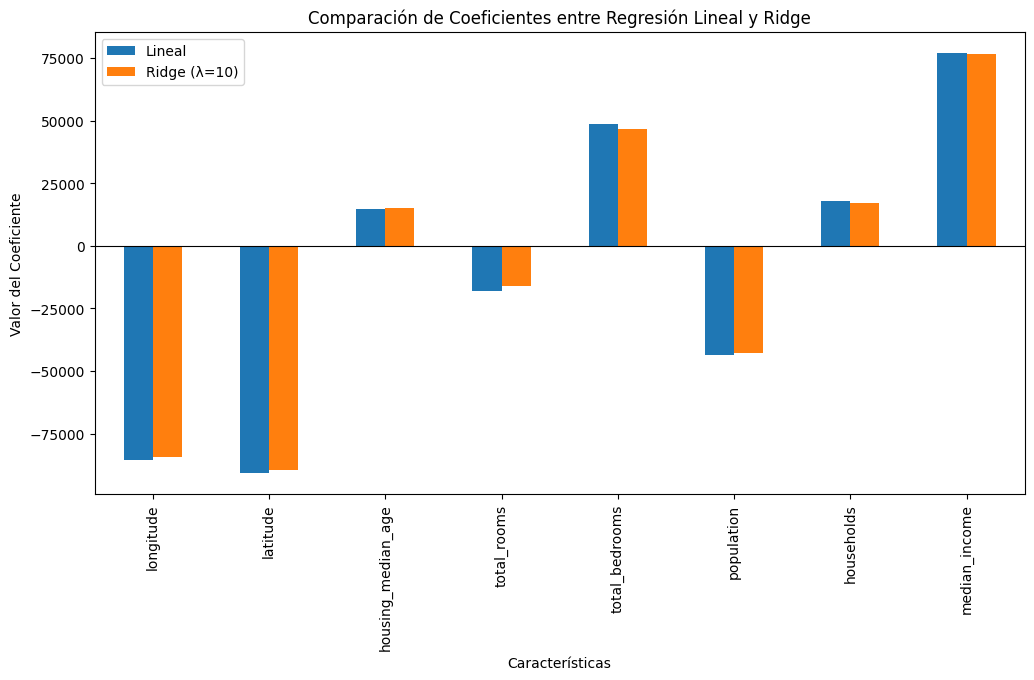

In [17]:
# Coeficientes de los modelos
coef_linear = linear_model.coef_
coef_ridge = ridge_model.coef_

# Crear un DataFrame para comparar coeficientes
coef_df = pd.DataFrame({
    'Características': data.drop(columns=['median_house_value', 'ocean_proximity']).columns,
    'Lineal': coef_linear,
    'Ridge (λ=10)': coef_ridge
})

# Visualización de los coeficientes
coef_df.set_index('Características').plot(kind='bar', figsize=(12, 6))
plt.title('Comparación de Coeficientes entre Regresión Lineal y Ridge')
plt.ylabel('Valor del Coeficiente')
plt.xlabel('Características')
plt.axhline(0, color='black', linewidth=0.8)
plt.legend()
plt.show()
